# Diviser pour régner

## Rappel de cours

La méthode DPR suit la stratégie suivante :  
On prend un problème (généralement complexe à résoudre), on divise ce problème en une multitude de petits problèmes, l'idée étant que les "petits problèmes" seront plus simples à résoudre que le problème original.   
Une fois les petits problèmes résolus, on recombine les "petits problèmes résolus" afin d'obtenir la solution du problème de départ.  

Cette méthode repose a donc sur 3 étapes :  
* **Diviser** : le problème d'origine est divisé en un certain nombre de sous-problème (en utilisant la récursivité)  
* **Régner** : On résout les sous-problèmes (car ils sont plus faciles à résoudre que le problème d'origine)  
* **Combiner** : les solutions des sous-problèmes sont combinées afin d'obtenir la solution au problème d'origine.

## Exemples

### Recherche du maximum dans une liste

Ci-dessous une **version itérative** classique du problème.

In [ ]:
def maximum(liste):
    maxi = liste[0]
    for elt in liste:
        if elt > maxi:
            maxi = elt
    return maxi

tableau = [5, 71, 23, 45, 28, 89, 63, 39]
maximum(tableau)

Bien sur on peut faire aussi ça :

In [ ]:
tableau = [5, 71, 23, 45, 28, 89, 63, 39]
max(tableau)

Une **version diviser pour régner** :  
On part du principe que le maximum d'un tableau de taille 1 est son unique entier.  
On va donc diviser le tableau en parties droite et gauche sensiblement de même taille jusqu'à obtenir des tableaux de taille 1.  
On va ensuite retourner le plus grand des maxima des parties gauche et droite.  

In [ ]:
def maximum_DPR(liste):
    if len(liste)==1:
        return liste[0]
    else:
        milieu = len(liste)//2
        maxiDroite = maximum_DPR(liste[milieu :])
        maxiGauche = maximum_DPR(liste[: milieu])
        if maxiDroite >= maxiGauche:
            return maxiDroite
        else:
            return maxiGauche

tableau = [5, 71, 23, 45, 28, 89, 63, 39]
maximum_DPR(tableau)

Rq. ce type de recherche n'est pas très efficace et même moins efficace que la recherche itérative classique.  
Ci dessous, on mesure le temps de calcul pour des listes aléatoires de 1 à 1000 éléments pour des nombres compris entre 1 et 10000.  
Observez le résultat, il est assez parlant.

In [ ]:
import timeit
from functools import partial
from random import randint

def randlist(n):
    return [randint(1,10000) for _ in range(n)]


x1,y1=[],[]
for i in range(1,1000,10):
    mesure = timeit.timeit(partial(maximum,randlist(i)), globals=globals(), number=100)/100
    x1.append(i)
    y1.append(mesure)

x2,y2=[],[]
for i in range(1,1000,10):
    mesure = timeit.timeit(partial(maximum_DPR,randlist(i)), globals=globals(), number=100)/100
    x2.append(i)
    y2.append(mesure)
    
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
fig = plt.figure(figsize=(10, 10))
plt.plot(x1,y1,'--bo',label = 'Maximum itératif')
plt.plot(x2,y2,'--ro',label = 'Maximum DPR')
plt.xlabel('taille n')
plt.ylabel('temps de calcul en secondes [s]')
plt.legend(loc='upper left')
plt.grid()
plt.show()

### Recherche d'un élément dans une liste

Une **version itérative** du problème :

In [ ]:
def recherche(liste, e):
    for elt in liste:
        if elt == e:
            return True
    return False
tableau = [5, 71, 23, 45, 28, 89, 63, 39]
recherche(tableau, 23)

Une **version DPR**    
Comme précédemment, on part du principe que un tableau de taille 1 contient ou non l'élement recherché.  
On divise le tableau en parties droite et gauche sensiblement de même taille jusqu'à obtenir des tableaux de taille 1.  
Le tableau contient l'élement recherché si la partie gauche ou la partie droite renvoie vrai.

In [ ]:
def recherche_DPR(liste, element):
    if len(liste)==1:
        return liste[0] == element
    else:
        milieu = len(liste)//2
        rechercheDroite = recherche_DPR(liste[milieu :], element)
        rechercheGauche = recherche_DPR(liste[: milieu], element)
        if rechercheDroite ==  True or rechercheGauche == True:
            return True
        else:
            return False
tableau = [5, 71, 23, 45, 28, 89, 63, 39]
recherche_DPR(tableau, 23)

Comme précédemment c'est assez inefficace, la preuve

In [ ]:
import timeit
from functools import partial
from random import randint

def randlist(n):
    return [randint(1,10000) for _ in range(n)]


x1,y1=[],[]
for i in range(1,1000,10):
    mesure = timeit.timeit(partial(recherche,randlist(i), 42424), globals=globals(), number=100)/100
    x1.append(i)
    y1.append(mesure)

x2,y2=[],[]
for i in range(1,1000,10):
    mesure = timeit.timeit(partial(recherche_DPR,randlist(i), 42424), globals=globals(), number=100)/100
    x2.append(i)
    y2.append(mesure)
    
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
fig = plt.figure(figsize=(10, 10))
plt.plot(x1,y1,'--bo',label = 'Recherche itératif')
plt.plot(x2,y2,'--ro',label = 'Recherche DPR')
plt.xlabel('taille n')
plt.ylabel('temps de calcul en secondes [s]')
plt.legend(loc='upper left')
plt.grid()
plt.show()

**Pourquoi est-ce assez inefficace ?**  
Dans le cas du maximum, on fait autant d'appels récursif qu'il y a d'élements dans le tableau (pour obtenir des tableaux de taille 1) donc n appels récursifs puis ensuite on compare les maximums de chaque partie (n-1 comparaison). Dans le cas de l'algorithme itératif, on effectue n comparaison et c'est terminé.  
Dans le cas de la recherche dans un tableau non trié, là aussi on fait autant d'appels récursif qu'il y a d'élements dans le tableau  puis on fait n-1 tests vrai ou faux. Dans l'algorithme itératif on effectue n comparaison seulement. 

En revanche cette stratégie est efficace quand le tableau est trié.  

#### Une version dichotomique
En effet, dans ce cas on effectue une recherche dichotomique qui consiste à diviser le tableau en deux partie et à recherché l'élément dans les parties. Dans ce cas, on évite des étapes.  

Ci-dessous **l'algorithme itératif** :

In [ ]:
def recherche_dichotomique(L : list,element : float):
    """
    L est une liste triée dans l'odre croissant
    Retourne un booléen trouvé indiquant si l'élément val est dans la liste L
    """
    debut = 0
    fin = len(L)-1
    #compteur = 0
    while (debut <= fin):
        #compteur += 1 # Compteur de nombre de boucle WHILE
        milieu = (debut + fin) //2
        if L[milieu] == element:
            return True
        else :
            if element > L[milieu]:
                debut = milieu + 1
            else :
                fin = milieu - 1
    #print(compteur)
    return False
tableau = [5, 23, 28, 39, 45, 63, 71, 89]
recherche_dichotomique(tableau, 23)

Le même en **récursif**  
Cette fois le cas terminal est quand on a diminué la taille du tableau tel que indice de début et de fin deviennent égaux.

In [ ]:
def recherche_dicho_rec( liste_triee, element, indDeb = 0, indFin = -1 ):
    if indDeb == indFin : 
        return False
    if indFin == -1 : 
        indFin = len(liste_triee)-1
    m = (indDeb + indFin)//2
    if liste_triee[m] == element :
        return True
    elif liste_triee[m] > element :
        return recherche_dicho_rec(liste_triee,element, indDeb, m-1)
    else :
        return recherche_dicho_rec(liste_triee,element, m+1, indFin)
tableau = [5, 23, 28, 39, 45, 63, 71, 89]
recherche_dicho_rec(tableau, 25)

Et on voit que c'est bien plus efficace

In [ ]:
import timeit
from functools import partial

def listeTri(n):
    return [i for i in range(n)] # génére une liste triée

x1,y1=[],[]
for i in range(1,1000,10):
    mesure = timeit.timeit(partial(recherche,listeTri(i), 42424), globals=globals(), number=100)/100
    x1.append(i)
    y1.append(mesure)

x2,y2=[],[]
for i in range(1,1000,10):
    mesure = timeit.timeit(partial(recherche_DPR,listeTri(i), 42424), globals=globals(), number=100)/100
    x2.append(i)
    y2.append(mesure)

x3,y3=[],[]
for i in range(1,1000,10):
    mesure = timeit.timeit(partial(recherche_dichotomique,listeTri(i), 4242), globals=globals(), number=100)/100
    x3.append(i)
    y3.append(mesure)    

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
fig = plt.figure(figsize=(10, 10))
plt.plot(x1,y1,'--bo',label = 'Recherche itératif')
plt.plot(x2,y2,'--ro',label = 'Recherche DPR')
plt.plot(x3,y3,'--go',label = 'Recherche dichtomique')
plt.xlabel('taille n')
plt.ylabel('temps de calcul en secondes [s]')
plt.legend(loc='upper left')
plt.grid()
plt.show()    

### Le tri fusion

Un dernier exemple qui reprend le concept DPR est le tri-fusion.  
Il consiste à fusionner deux sous-séquences triées en une seule séquence triée.  
Il fonctionne de la manière suivante :  
* On découpe les données à trier en deux parties plus ou moins égales (Diviser)  
* On trie les 2 sous-parties ainsi déterminées (Régner)  
* On fusionne les deux sous-parties pour retrouver les données de départ (Combiner) 

Le code de l'algorithme est donné ci-dessous et est à **comprendre et à connaître**

In [19]:
def tri_fusion(T):
    if len(T) <= 1:
        return T
    print(T) # pour voir les étapes de division de la liste
    milieu = len(T) // 2 # calcul de l'indice du milieu
    gauche = T[:milieu] # création liste gauche du début jusqu'au milieu
    droite = T[milieu:] # création liste droite du milieu jusqu'à la fin
    gauche = tri_fusion(gauche) # on relance tri_fusion sur la partie gauche
    # print(gauche)
    droite = tri_fusion(droite)
    # print(droite)
    return fusion(gauche, droite)

In [20]:
def fusion(gauche,droite):
    # la fusion a déjà été réalisée en première dans la partie algorithme de tri
    # exercice 05b_exo2.py
    
    listeFusion=[]
    i=0 # index de gauche
    j=0 # index de droite
    # Cette boucle effectue la comparaison et place dans la listeFusion
    # soit l'élement de la liste de gauche, soit l'élément de la liste droite
    # Elle s'arrête quand on arrive à la fin d'une des deux listes
    while i<len(droite) and j<len(gauche):
        if droite[i]<=gauche[j]:
            listeFusion.append(droite[i])
            i=i+1
        else:
            listeFusion.append(gauche[j])
            j=j+1
    
    # les deux boucles suivantes pour ajouter les éléments restants de la liste 1 ou de la liste 2    
    while i<len(droite):
        listeFusion.append(droite[i])
        i=i+1
        
    while j<len(gauche):
        listeFusion.append(gauche[j])
        j=j+1
    
    return listeFusion

In [ ]:
L2=[7,4,2,1,8,5,6,3]

print(tri_fusion(L2))

## Exercices type épreuve pratique

De nombreux exercices dans cette partie consiste à écrire des fonctions de recherche : 
* recherche d'occurences  dans une liste
* recherche de minimum et maximum  
* recherche de l'indice de la valeur maximale et/ou minimale  
* nombre d'oocurences dans une liste  

Ces exercices peuvent être résolus par une version itérative présentées précédemment mais ausis par une version récursive ou DPR. Bien sûr rien ne vous y oblige sauf si c'est expréssement indiqué dans le sujet.

<div class="alert alert-info"><b>Exercice 1</b><br/>
    
Écrire une fonction `recherche` qui prend en paramètres `caractere`, un caractère, et `mot`, une chaîne de caractères, et qui renvoie le nombre d’occurrences de `caractere` dans `mot`, c’est-à-dire le nombre de fois où `caractere` apparaît dans `mot`. 
    
```
Exemples :
>>> recherche('e', "sciences")
2
>>> recherche('i',"mississippi")
4
>>> recherche('a',"mississippi")
0
```

<details>
<summary style="border:1pt solid #FE2E2E; border-radius:5pt; width:15%; color:black; padding:3px; background-color: white ; cursor: pointer;" > Réponse </summary>  
    
<div> 
<code>

def recherche(caractere,mot):
    occurrence = 0
    for c in mot:
        if c == caractere:
            occurrence += 1
    return occurrence
</code>

</div>
</details>

<details>
<summary style="border:1pt solid #FE2E2E; border-radius:5pt; width:15%; color:black; padding:3px; background-color: white ; cursor: pointer;" > Réponse récursive </summary>  
    
<div> 
<code>

def recherche_rec(caractere, mot):
    if len(mot) == 1:
        if mot[0]==caractere:
            return 1
        else: 
            return 0
    else:
        if mot[0] == caractere:
            return 1 + recherche_rec(caractere, mot[1:])
        else:
            return recherche_rec(caractere, mot[1:])
</code>

</div>
</details>

<div class="alert alert-info"><b>Exercice 2</b><br/>
    
Écrire une fonction `recherche` qui prend en paramètres un tableau `tab` de nombres entiers triés par ordre croissant et un nombre entier `n`, et qui effectue une **recherche dichotomique** du nombre entier `n` dans le tableau non vide `tab`.  
Cette fonction doit renvoyer un indice correspondant au nombre cherché s’il est dans le tableau, -1 sinon.
```
Exemples:
>>> recherche([2, 3, 4, 5, 6], 5)
3
>>> recherche([2, 3, 4, 6, 7], 5)
-1
```   

<details>
<summary style="border:1pt solid #FE2E2E; border-radius:5pt; width:15%; color:black; padding:3px; background-color: white ; cursor: pointer;" > Réponse </summary>  
    
<div> 
<code>

def recherche(tab,elt):
    ind_debut = 0
    ind_fin = len(tab)-1
    while ind_fin > ind_debut:
        ind_milieu = (ind_fin+ind_debut)//2
        if tab[ind_milieu]==elt:
            return ind_milieu
        elif tab[ind_milieu]>elt:
            ind_fin=ind_milieu-1
        else:
            ind_debut=ind_milieu+1
    return -1
</code>

</div>
</details>

<details>
<summary style="border:1pt solid #FE2E2E; border-radius:5pt; width:15%; color:black; padding:3px; background-color: white ; cursor: pointer;" > Réponse récursive </summary>  
    
<div> 
<code>

def recherche_dicho_rec( liste_triee, element, indDeb = 0, indFin = -1 ):
    if indDeb == indFin : 
        return False
    if indFin == -1 : 
        indFin = len(liste_triee)-1
    m = (indDeb + indFin)//2
    if liste_triee[m] == element :
        return True
    elif liste_triee[m] > element :
        return recherche_dicho_rec(liste_triee,element, indDeb, m-1)
    else :
        return recherche_dicho_rec(liste_triee,element, m+1, indFin)
</code>

</div>
</details>

<div class="alert alert-info"><b>Exercice 3</b><br/>
    
Recopier et compléter sous Python la fonction suivante en respectant la spécification. On ne recopiera pas les commentaires.
```
    def dichotomie(tab, x):
         """
         tab : tableau d’entiers trié dans l’ordre croissant
         x : nombre entier
         La fonction renvoie True si tab contient x et False sinon
         """
         
         debut = 0
         fin = len(tab) - 1
         while debut <= fin:
             m = ...
             if x == tab[m]:
                 return ...
             if x > tab[m]:
                 debut = m + 1
             else:
                 fin = ...
         return ...
```
Exemples :
```
>>> dichotomie([15, 16, 18, 19, 23, 24, 28, 29, 31, 33],28)
True
>>> dichotomie([15, 16, 18, 19, 23, 24, 28, 29, 31, 33],27)
False  
```

<details>
<summary style="border:1pt solid #FE2E2E; border-radius:5pt; width:15%; color:black; padding:3px; background-color: white ; cursor: pointer;" > Réponse </summary>  
    
<div> 
<code>

def dichotomie(tab, x):
    """
        tab : tableau d’entiers trié dans l’ordre croissant
        x : nombre entier
        La fonction renvoie True si tab contient x et False sinon
    """

    debut = 0 
    fin = len(tab) - 1
    while debut <= fin:
        m = (debut+fin)//2 #
        if x == tab[m]:
            return True
        if x > tab[m]:
            debut = m + 1
        else:
             fin = m-1 #         
    return False
</code>

</div>
</details>

<div class="alert alert-info"><b>Exercice 4</b><br/>
    
Programmer la fonction `fusion` prenant en paramètres deux tableaux non vides `tab1` et `tab2` (type list) d'entiers, chacun dans l’ordre croissant, et renvoyant un tableau trié dans l’ordre croissant et contenant l’ensemble des valeurs de `tab1` et `tab2`.
Exemples :
```
 >>> fusion([3, 5], [2, 5])
 [2, 3, 5, 5]
 >>> fusion([-2, 4], [-3, 5, 10])
 [-3, -2, 4, 5, 10]
 >>> fusion([4], [2, 6])
 [2, 4, 6]
```

<details>
<summary style="border:1pt solid #FE2E2E; border-radius:5pt; width:15%; color:black; padding:3px; background-color: white ; cursor: pointer;" > Réponse </summary>  
    
<div> 
<code>

def fusion(tab1,tab2):
    i1,i2 = 0,0
    tab = []
    while i1 < len(tab1) and i2 < len(tab2):
        if tab1[i1] < tab2[i2]:
            tab.append(tab1[i1])
            i1 += 1
        else:
            tab.append(tab2[i2])
            i2 += 1
    tab = tab + tab1[i1:] + tab2[i2:]
    return tab
</code>

</div>
</details>

## Exercices type épreuve écrite

<div class = "alert alert-block alert-warning"><b>Exercice 1</b>
    
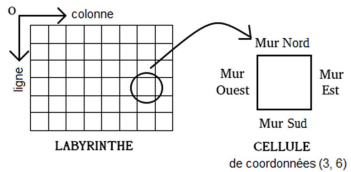

Un labyrinthe est composé de cellules possédant chacune quatre murs (voir ci-dessus). La cellule en haut à gauche du labyrinthe est de coordonnées (0, 0). On définit la classe `Cellule` ci-dessous. Le constructeur possède un attribut `murs` de type `dict` dont les clés sont `’N’`, `’E’`, `’S’` et `’O’` et dont les valeurs sont des booléens (`True` si le mur est présent et `False` sinon).  
    
```
    class Cellule:
        def __init__(self, murNord, murEst, murSud, murOuest):
             self.murs={'N':murNord,'E':murEst,'S':murSud,'O':murOuest}     
```
1. Recopier et compléter sur la copie l'instruction Python suivante permettant de créer une instance `cellule` de la classe `Cellule` possédant tous ses murs sauf le mur Est.  
```
cellule  = Cellule(...)
```

2. Le constructeur de la classe `Labyrinthe` ci-dessous possède un seul attribut `grille`. La méthode `construire_grille` permet de construire un tableau à deux dimensions `hauteur` et `longueur` contenant des cellules possédant chacune ses
quatre murs. Recopier et compléter sur la copie les lignes 6 à 10 de la classe `Labyrinthe`.  
    
```
1    class Labyrinthe:
2         def __init__(self, hauteur, longueur):
3             self.grille=self.construire_grille(hauteur, longueur)
4         def construire_grille(self, hauteur, longueur):
5             grille = []
6             for i in range(...):
7                  ligne = []
8                  for j in range(...):
9                       cellule = ...
10                       ligne.append(...)
11                 grille.append(ligne)
12            return grille 
```
   
Pour générer un labyrinthe, on munit la classe `Labyrinthe` d'une méthode `creer_passage` permettant de supprimer des murs entre deux cellules ayant un côté commun afin de créer un passage. Cette méthode prend en paramètres les coordonnées `c1_lig`, `c1_col` d'une cellule notée `cellule1` et les coordonnées `c2_lig`, `c2_col` d'une cellule notée `cellule2` et crée un passage entre `cellule1` et `cellule2`.  
    
```
13        def creer_passage(self, c1_lig, c1_col, c2_lig, c2_col):
14             cellule1 = self.grille[c1_lig][c1_col]
15             cellule2 = self.grille[c2_lig][c2_col]
16             # cellule2 au Nord de cellule1
17             if c1_lig - c2_lig == 1 and c1_col == c2_col:
18                  cellule1.murs['N'] = False
19                  ....
20             # cellule2 à l’Ouest de cellule1
21             elif ....
22                  ....
23                  .... 
```
    
3. La ligne 18 permet de supprimer le mur Nord de `cellule1`. Un mur de `cellule2` doit aussi être supprimé pour libérer un passage entre `cellule1` et `cellule2` .  
Écrire l'instruction Python que l'on doit ajouter à la ligne 19.  
    
4. Recopier et compléter sur la copie le code Python des lignes 21 à 23 qui permettent le traitement du cas où `cellule2` est à l’Ouest de `cellule1` : 

<div class = "alert alert-block alert-warning">
    
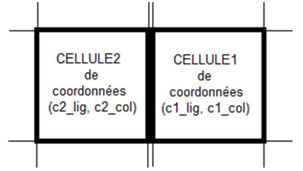

Pour créer un labyrinthe, on utilise la méthode diviser pour régner en appliquant récursivement l'algorithme `creer_labyrinthe` sur des sous-grilles obtenues en coupant la grille en deux puis en reliant les deux sous-labyrinthes en créant un passage entre eux.  

<div class = "alert alert-block alert-warning">
    
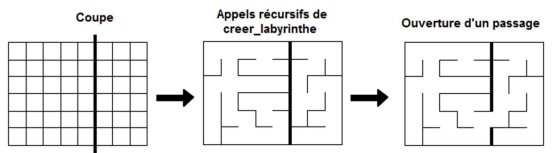

La méthode `creer_labyrinthe` permet, à partir d'une grille, de créer un labyrinthe de hauteur `haut` et de longueur `long` dont la cellule en haut à gauche est de coordonnées (`ligne, colonne`).  
Le cas de base correspond à la situation où la grille est de hauteur 1 ou de largeur 1. Il suffit alors de supprimer tous les murs intérieurs de la grille. 

<div class = "alert alert-block alert-warning">

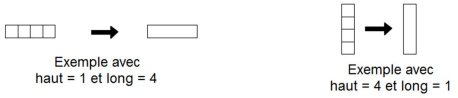
    
5. Recopier et compléter sur la copie les lignes 25 à 30 de la méthode `creer_labyrinthe` traitant le cas de base.  
    
```
24         def creer_labyrinthe(self, ligne, colonne, haut, long):
25             if haut == 1 : # Cas de base
26                 for k in range(...):
27                     self.creer_passage(ligne, k, ligne, k+1)
28             elif long == 1: # Cas de base
29                 for k in range(...):
30                     self.creer_passage(...)
31             else: # Appels récursifs
32                  # Code non étudié (Ne pas compléter)     
```
6. Dans cette question, on considère une grille de hauteur `haut = 4` et de longueur `long = 8` dont chaque cellule possède tous ses murs.  
On fixe les deux contraintes supplémentaires suivantes sur la méthode `creer_labyrinthe` :  
* Si `haut ≥ long`, on coupe horizontalement la grille en deux sous-labyrinthes de même dimension.  
* Si `haut < long`, on coupe verticalement la grille en deux sous-labyrinthes de même dimension.  
                    
L'ouverture du passage entre les deux sous-labyrinthes se fait le plus au Nord pour une coupe verticale et le plus à l'Ouest pour une coupe horizontale.  
Dessiner le labyrinthe obtenu suite à l'exécution complète de l'algorithme `creer_labyrinthe` sur cette grille.     

<details>
<summary style="border:1pt solid #FE2E2E; border-radius:5pt; width:15%; color:black; padding:3px; background-color: white ; cursor: pointer;" > Correction </summary>  
    
<div>
    
<b>Question 1</b><br/>
L'ordre des murs dans le constructeur est nord, est, sud, ouest, True et False indiquent respectivement la présence et l'absence. Donc une cellule ayant tous les murs sauf le mur est :<br/>
```
    cellule = Cellule(True,False,True,True)
```
<br/>
<b>Question 2</b><br/>
    
```
    class Labyrinthe:
        def __init__(self, hauteur, longueur):
            self.grille=self.construire_grille(hauteur, longueur)
        def construire_grille(self, hauteur, longueur):
            grille = []
            for i in range(hauteur):
                ligne = []
                for j in range(longueur):
                    cellule = Cellule(True, True, True, True)
                    ligne.append(cellule)
                grille.append(ligne)
            return grille
```
<br/>
<b>Question 3</b><br/>
a.On se trouve dans la situation où cellule2 se trouve au dessus de cellule1, pour ouvrir un passage, on doit donc supprimer le mur nord de la cellule 1 et aussi le mur sud de la cellule 2. L'instruction python manquante ligne 19 est donc : <br/>
    
```
    cellule2.murs['S'] = False
```
<br/>
<b>Question 4</b><br/>
Dans ce cas, on doit supprimer le mur est de la cellule 2 et le mur ouest de la cellule 1.<br/>
    
```
    def creer_passage(self, c1_lig, c1_col, c2_lig, c2_col):
        cellule1 = self.grille[c1_lig][c1_col]
        cellule2 = self.grille[c2_lig][c2_col]
        # cellule2 au Nord de cellule1
        if c1_lig - c2_lig == 1 and c1_col == c2_col:
            cellule1.murs['N'] = False
            cellule2.murs['S'] = False
        # cellule2 à l’Ouest de cellule1
        elif c1_col - c2_col ==1 and c1_lig == c2_lig:
            cellule1.murs['O'] = False
            cellule2.murs['E'] = False   
```
<br/>    
<b>Question 5</b><br/>
    
```
def creer_labyrinthe(self, ligne, colonne, haut, long):
    if haut == 1 : # Cas de base
        for k in range(colonne,colonne+long-1):
            self.creer_passage(ligne, k, ligne, k+1)
    elif long == 1: # Cas de base
            for k in range(ligne,ligne+haut-1):
            self.creer_passage(k,colonne,k+1,colonne)
    else: # Appels récursifs
    # Code non étudié (Ne pas compléter)  
```
<br/>    
<b>Question 6</b><br/>
Le labyrinthe de départ est de dimension 4x8, donc :<br/>

- on le découpe verticalement en deux labyrinthes 4x4<br/>
- on découpe horizontalement en deux labyrinthes 2x4<br/>
- on découpe verticalement en deux labyrinthes 2x2<br/>
- on découpe horizontalement en deux labyrinthes 1x2<br/>
- on atteint la condition d'arrêt en créant donc des couloirs de 1x2
- On remonte en assemblant ces labyrinthes et en créant des ouvertures entre eux comme indiqué dans l'énoncé à savoir le plus au nord pour une coupe verticale et le plus à l'Ouest pour une coupe horizontale <br/><br/>
    
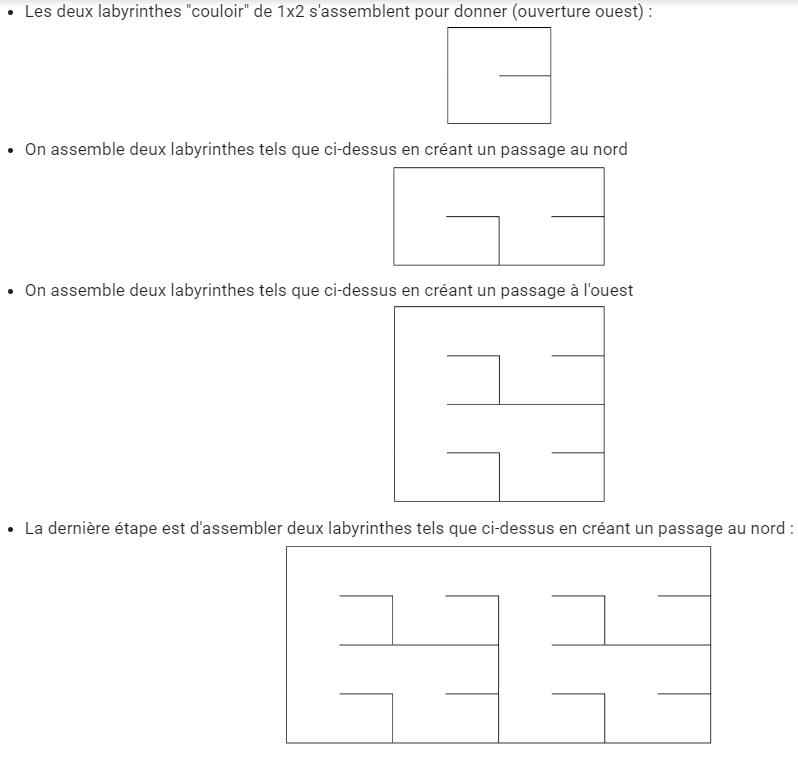    
</div>
</details>

<div class = "alert alert-block alert-warning"><b>Exercice 2</b>

Une ligne polygonale est constituée d’une liste ordonnée de points, appelés sommets, joints par des segments. L’algorithme de Douglas-Peuker permet de simplifier une ligne polygonale en supprimant certains de ses sommets. L’effet de l’algorithme appliqué aux lignes polygonales du contour de la France métropolitaine est illustré ci-dessous.  
    
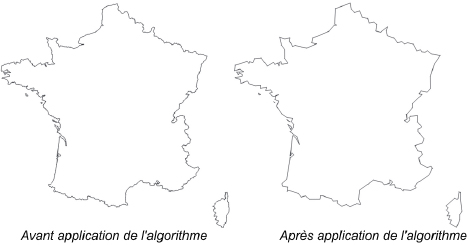

On implémentera cet algorithme dans la dernière question de l'exercice. Pour cela nous allons d'abord implémenter des fonctions auxiliaires.  
On suppose dans la suite que les sommets sont des points du plan dont les coordonnées `(x,y)` dans un repère orthonormé fixé sont représentées par des tuples de longueur 2.  
    
1. La distance qui sépare deux points `A` et `B` de coordonnées `(xA,yA) et (xB,yB)` est donnée par la formule 
    $\sqrt{ (xB - xA)^2 + (yB - yA)^2}$.  
    
On rappelle que la fonction `sqrt` du module `math` de Python renvoie la racine carrée d’un nombre positif ou nul.  
 a. Écrire une instruction qui permet d'importer la fonction `sqrt` du module `math` .    
 b. Supposant l'import réalisé, écrire une fonction `distance_points(a,b)` qui prend en argument deux tuples a et b représentant les coordonnées de deux points et renvoie la distance qui les sépare.  
    
2. On dispose d’une fonction `distance_point_droite(p, a, b)` qui prend en argument les tuples représentant les coordonnées respectives des points `P`, `A` et `B`, et qui renvoie la distance du point `P` à la droite `(AB)` L'exécution de cette fonction produit une erreur dans le cas où les points `A` et `B` sont égaux.  
À l'aide des fonctions `distance_points` et `distance_point_droite` , écrire une fonction `distance(p,a,b)` qui renvoie la distance entre le point `P` et la droite `(AB)` si les points `A` et `B` sont distincts et la distance `AP` sinon.  
    
Dans la suite, on dira que la fonction `distance` calcule la distance entre le point `P` et les points `A` et `B`, éventuellement confondus.  
    
3. On a besoin d’une fonction `le_plus_loin(ligne)` qui prend en argument une liste de tuples représentant les coordonnées des points d’une ligne polygonale. Cette fonction doit renvoyer un tuple composé de :  
 - l’indice du point de coordonnées `p` de la ligne polygonale d’extrémités `deb` et `fin`, pour lequel la distance `distance(p, deb, fin)` est la plus grande ;
 - la valeur correspondante de cette distance.  
    
On fournit le code incomplet suivant :  
```
    def le_plus_loin(ligne):
        n = len(ligne)
        deb = ligne[0]
        fin = ligne[n-1]
        dmax = 0
        indice_max = 0
        for idx in range(1, n-1):
             p = ...
             d = distance(p, deb, fin)
             if ...:
                 ...
                 ...
        return ...
```
    
Recopier et compléter le code de cette fonction.  
    
4. Écrire une fonction `extrait(tab, i, j)` qui renvoie la copie du tableau tab des cases d'indice i inclus à j inclus pour `0 ≤ i ≤ j < len(tab)`.  
L'appel `extrait([7, 4, 9, 12], 2, 3)` renverra ainsi `[9, 12]`.  
    
L’algorithme de Douglas-Peuker repose sur une stratégie de type « diviser pour régner ».  
Pour éliminer des sommets « proches de l’alignement », un seuil est fixé.  
    
    
Étant donnée une ligne polygonale, le principe de l’algorithme est le suivant :  
* si la ligne ne contient qu’un ou deux sommets, l’algorithme se termine ;  
* sinon, on considère la droite formée par les extrémités de la ligne (son premier et dernier sommet), et on sélectionne le point le plus éloigné de cette droite (dans le cas où les extrémités sont confondues, on sélectionne le point le plus éloigné de celles-ci) :
  - si la distance entre le point sélectionné et la droite (ou les extrémités lorsqu’elles sont confondues) est inférieure au seuil fixé, on ne conserve que les extrémités de la ligne polygonale ;

<div class = "alert alert-block alert-warning">
    
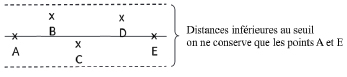

<div class = "alert alert-block alert-warning">
  
 *  -  sinon, on applique l’algorithme de manière récursive aux deux parties de la ligne polygonale formées de la séquence formée du premier sommet jusqu’au sommet sélectionné d’une part et de la séquence formée du sommet sélectionné jusqu’au dernier sommet d’autre part. L’algorithme renvoie alors la concaténation des séquences simplifiées ainsi obtenues.

<div class = "alert alert-block alert-warning">

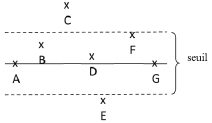

<div class = "alert alert-block alert-warning">

L'algorithme appelé sur la ligne polygonale [A,B,C,D,E,F,G] ci-dessus, va récursivement être appelé sur les lignes polygonales [A,B,C] et [C,D,E,F,G].  
    
La ligne polygonale que l'on obtiendra à la fin de l'algorithme sera [A,C,E,G]

<div class = "alert alert-block alert-warning">

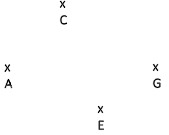

<div class = "alert alert-block alert-warning">

5. L’algorithme de Douglas-Peuker est implémenté par la fonction simplifie ci-dessous, qui prend en argument la ligne polygonale et le seuil choisi.  
    
```
    def simplifie(ligne, seuil):
        n = len(ligne)
        if n <= 2:
            return ...
        else:
            indice_max, dmax = le_plus_loin(ligne)
            
            if dmax <= seuil:
                return ...
            else:
                # bloc à écrire
    
```
Recopier et compléter le code de cette fonction.


<details>
<summary style="border:1pt solid #FE2E2E; border-radius:5pt; width:15%; color:black; padding:3px; background-color: white ; cursor: pointer;" > Correction </summary>  
    
<div>
    
<b>Question 1</b><br/>
a. Pour importer la fonction sqrt du module math, on peut écrire :<br/>
```
    from math import sqrt
```
<br/>
b.<br/>
```
    def distance_points(a,b):
        xa,ya = a
        xb,yb = b
        return sqrt((xb-xa)**2+(yb-ya)**2)
```
<br/>
<b>Question 2</b><br/>
    
```
    def distance(p,a,b):
        if a == b:
            return distance(p,a)
        else:
            return distance_point_droite(p, a, b)
```
<br/>
<b>Question 3</b><br/>
    
```
    def le_plus_loin(ligne):
        n = len(ligne)
        deb = ligne[0]
        fin = ligne[n-1]
        dmax = 0
        indice_max = 0
        for idx in range(1,n-1):
            p = ligne[idx]
            d = distance(p, deb, fin)
            if d > dmax:
                dmax = d
                indice_max = idx
        return indice_max, dmax
```
<br/>
<b>Question 4</b><br/>
    
```
    def extrait(tab, i, j):
        return [tab[k] for k in range(i,j+1)]  
```
<br/>    
<b>Question 5</b><br/>
    
```
def simplifie(ligne,seuil):
    n = len(ligne)
    if n <=2:
        return ligne
    else:
        indice_max, dmax = le_plus_loin(ligne)
        if dmax <= seuil:
            return [ligne[0],ligne[n-1]]
        else:
            s1 = simplifie(extrait(ligne, 0, indice_max), seuil)
            s2 = simplifie(extrait(ligne, indice_max, n-1), seuil)
            return s1[:-1] + s2 # suppression du doublon 
```
   
</div>
</details>